<a href="https://colab.research.google.com/github/limlimlim99/limjihyeonjjang/blob/main/12_10_%EB%94%A5%EB%9F%AC%EB%8B%9D_%EB%B3%B5%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# mnist샘플 불러오기
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels)=mnist.load_data()

In [2]:
train_images.shape

(60000, 28, 28)

In [3]:
len(train_labels)

60000

In [4]:
test_images.shape

(10000, 28, 28)

In [5]:
len(test_images)

10000

In [ ]:
#Sequential 모델은 순차적으로 레이어 층을 더해주기 때문에 순차모델이라 불리고 만들기도 쉽다.

In [8]:
# 신경망 만들기
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# 신경망의 핵심 구성 요소는 층이다. 층= 데이터를 위한 필터.
# fully connected(완전연결, 조밀하게 연결된 신경망층)Dense 층 2개
# 마지막 층은 10개의 확률 점수가 들어가 있는 배열을 반환하는 소프트맥스 분류층(배열을 모두 더하면 1임)

In [9]:
from tensorflow.python import metrics
# 컴파일 단계
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
# 훈련을 시작하기 전에 데이터를 모델에 맞는 크기로 바꾸고 모든 값을 0과1사이로 스케일을 조정
# [0,255] 사이의 값인 uint8 타입의 (60000, 28, 28)크기를 가진 배열로 저장되어있는 것을 0과1사이의 값을 가지는 flaot32타입으로 변경해줘야함

In [10]:
# 이미지 데이터 준비하기
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype("float32") / 255

In [11]:
# fit()메서드를 호출하여 훈련 모델에 학습시키기
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 5ms/step - loss: 0.2539 - accuracy: 0.9268
Epoch 2/5
469/469 [==============================] - 3s 5ms/step - loss: 0.1028 - accuracy: 0.9692
Epoch 3/5
469/469 [==============================] - 3s 5ms/step - loss: 0.0680 - accuracy: 0.9796
Epoch 4/5
469/469 [==============================] - 3s 5ms/step - loss: 0.0506 - accuracy: 0.9848
Epoch 5/5
469/469 [==============================] - 3s 5ms/step - loss: 0.0372 - accuracy: 0.9888


In [12]:
# 모델을 사용하여 예측 만들기
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

# 출력된 배열의 인덱스 i에 있는 숫자 이미지는 test_digits[0]이 클래스i에 속할 확률에 해당함

1/1 [==============================] - 0s 48ms/step


array([1.3758698e-09, 1.6049991e-10, 3.1312447e-06, 4.0327865e-04,
       3.8273756e-11, 1.5918818e-08, 1.8722723e-14, 9.9959081e-01,
       1.2575283e-07, 2.7403612e-06], dtype=float32)

In [13]:
predictions[0].argmax()
# 출력값의 7이 가장 큰 확률을 가짐

7

In [16]:
predictions[0][7]
# 7의 값

0.9995908

In [18]:
# 전체 테스트 세트에 대해 평균적인 정확도 계산
# 새로운 데이터에 모델 평가하기
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"테스트 정확도:{test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0694 - accuracy: 0.9786
테스트 정확도:0.978600025177002


In [ ]:
# 테스트 정확도는 훈련세트정확도보다 약간 낮음
# 훈련 정확도와 테스트 정확도 사이의 차이는 과대적합 때문임

In [ ]:
------------------------------------------------------

In [19]:
# 텐서: 데이터를 위한 컨테이너(담아두는 공간)
# 일반적으로 수치형 데이터를 다루므로 숫자를 위한 컨테이너임
# 텐서는 임의의 차원 개수를 가지는 행렬의 일반화된 모습(텐서에서는 차원을 종종 축(axis)라고 부름)

In [20]:
# 텐서: 다차원 배열
# 배열: np.array
# 벡터: 1차원 배열
# 행렬: 2차원 배열
# 텐서: 3차원 이상 배열

In [24]:
# mnist데이터 불러오기
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) =mnist.load_data()

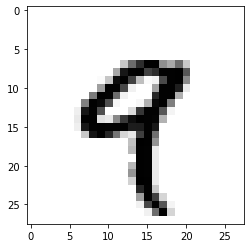

In [26]:
# 텐서를 이용해 다섯번째 이미지 출력하기
import matplotlib.pyplot as plt

digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [ ]:
# 텐서의 실제 사례

# 벡터 데이터(samples, features): 크기의 랭크-2 텐서, 각 샘플은 수치 속성(특성)으로 구성된 벡터
# 시계열 데이터 또는 시퀀스 데이터: (samples, timesteps, features)크기의 랭크-3텐서, 각 샘플은 특성 벡터의 길이가 timesteps인 시퀀스
# 이미지: (samples, height, width, channels) 또는 (samples, channels, height, width)크기의 랭크-4텐서. 각 샘플은 픽셀의 2D격자고 각 픽셀은 수치값(채널channel)의 벡터임
# 동영상: (samples, frames, height, width, channels) 또는 (samples, frames, channels, height, width)크기의 랭크-5텐서. 각 샘플은 이미지의 길이가frames인 시퀀스

In [ ]:
---------------------------

In [ ]:
# 텐서 연산

In [52]:
# 원소별 연산

#for문
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [53]:
# 덧셈
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [49]:
# 넘파이의 원소별 연산
import numpy as np

z = x + y
z = np.maximum(z, 0.)

In [54]:
# 실제 시간 차이 재어보기
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 0.01 s


In [55]:
# 단순한 방법
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 1.67 s


In [ ]:
------------------------

In [56]:
# 브로드캐스팅

In [ ]:
# 1. 큰 텐서의 ndim에 맞도록 작은 텐서에(브로드캐스팅 축)축이 추가됨
# 2. 작은 텐서기 새 축을 따라서 큰 텐서의 크기에 맞도록 반복됨

In [57]:
# x의 크기: (32,10), y의 크기: (10,)
import numpy as np

x = np.random.random((32, 10))
y = np.random.random((10,))

In [64]:
# y에 비어있는 첫번째 축을 추가하여 크기를 (1, 10)으로 만든다
y = np.expand_dims(y, axis=0)
y

array([[[[[[[[0.9068548 , 0.46274307, 0.75220673, 0.32575976,
              0.18063442, 0.21344633, 0.83451963, 0.56200589,
              0.92205473, 0.64098575]]]]]]]])

In [67]:
# y를 이 축에 32번 반복하면서 텐서 y의 크기는 (32,10)이 됨
# Y[i, :] == y for i in range(0,32)
Y = np.concatenate([y] * 32, axis=0)

In [68]:
# 이제 x와 y의 크기가 같으므로 더할 수 있음
def navie_add_matrix_and_vector(x,y):
  assert len(x.shape) == 2
  assert len(y.shape) ==1
  assert x.shape[1] == y.shape[0]
  x = x.copy()
  for i in range(x.shape[0]):
    for j in rnage(x.shape[1]):
      x[i,j] += y[i]
    return x

In [69]:
# 크기가 다른 두 텐서에 브로드 캐스팅으로 원소별 maxium연산을 적용
import numpy as np

x = np.random.random((64, 3, 32, 10))
y = np.random.random((32,10))
z = np.maximum(x, y)

In [ ]:
-------------------------